In [1]:
import tensorflow as tf

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)

2.15.0


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report



In [51]:
import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
df= pd.read_csv("C:\\Users\\hp\\Desktop\\Telecom_customer_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [7]:
#Lets encode the oject datatype
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i])

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [14]:
x=df.drop(columns=["Churn"], axis=1)
y=df["Churn"]

In [20]:
#Feature Scaling of dataset
scalar=StandardScaler()
x_train=scalar.fit_transform(x)

In [22]:
x_train,x_test, y_train,y_test= train_test_split(x_train, y, test_size=0.25, random_state=0)

In [23]:
#Feature Scaling of dataset
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [24]:
x_train

array([[-0.97345945, -0.99546654, -0.43547634, ..., -0.53849448,
        -0.51431406, -1.50952654],
       [ 1.0547895 ,  1.0045541 ,  2.29633603, ..., -1.47259228,
         0.01784008, -0.11382699],
       [ 0.47738336,  1.0045541 , -0.43547634, ...,  1.32970114,
        -0.81959371, -1.44324142],
       ...,
       [ 0.58045671,  1.0045541 , -0.43547634, ...,  1.32970114,
        -1.46685329, -1.55194902],
       [ 0.20675477,  1.0045541 ,  2.29633603, ...,  0.39560333,
         0.16797762,  1.1551354 ],
       [ 1.70253952, -0.99546654, -0.43547634, ..., -0.53849448,
        -1.47853066,  1.67003824]])

In [25]:
x_test

array([[ 0.46565938, -0.99546654, -0.43547634, ...,  0.39560333,
        -0.21737538, -1.6892918 ],
       [-0.45711573,  1.0045541 , -0.43547634, ..., -0.53849448,
         1.73107615,  1.20392125],
       [-0.0145354 , -0.99546654, -0.43547634, ...,  0.39560333,
         0.24137819,  1.64670588],
       ...,
       [ 1.46903687, -0.99546654, -0.43547634, ...,  1.32970114,
        -1.49187622,  1.66261431],
       [-1.60020401,  1.0045541 , -0.43547634, ..., -1.47259228,
         0.73850024,  0.95468919],
       [ 1.24628121, -0.99546654, -0.43547634, ...,  1.32970114,
        -1.3350659 , -1.14204182]])

In [26]:
x_train.shape

(5282, 20)

In [27]:
x_test.shape

(1761, 20)

In [27]:
##Create ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [29]:
##Lets initialise ANN
classifier=Sequential()

In [30]:
##Adding input layers
classifier.add(Dense(units=21, activation='relu'))

In [31]:
##Adding first hidden layer
classifier.add(Dense(units=11, activation='relu'))

In [32]:
##Adding second hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [33]:
##Adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [34]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [36]:
import tensorflow
import keras
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [37]:
##Early stopping
early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    
)

In [38]:
model_history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000


354/354 [==============================] - 5s 4ms/step - loss: 0.5036 - accuracy: 0.7321 - val_loss: 0.4386 - val_accuracy: 0.7741
Epoch 2/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.7773 - val_loss: 0.4243 - val_accuracy: 0.7873
Epoch 3/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.7855 - val_loss: 0.4224 - val_accuracy: 0.7856
Epoch 4/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.7940 - val_loss: 0.4212 - val_accuracy: 0.7844
Epoch 5/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.7971 - val_loss: 0.4222 - val_accuracy: 0.7901
Epoch 6/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8021 - val_loss: 0.4207 - val_accuracy: 0.7953
Epoch 7/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8086 - val_loss: 0.4224 - val_accurac

In [40]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
import matplotlib as plt
import seaborn as sns

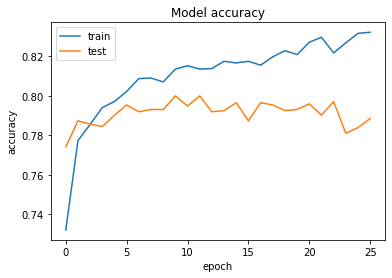

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.legend(['train','test'], loc='upper left')
plt.show()

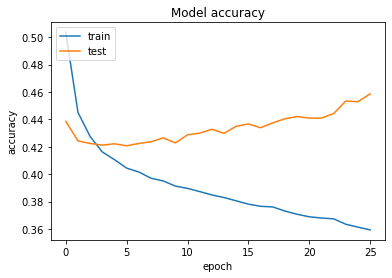

In [53]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.legend(['train','test'], loc='upper left')
plt.show()

In [54]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

56/56 [==============================] - 0s 1ms/step


In [55]:
##confusion matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1113,  185],
       [ 211,  252]], dtype=int64)

In [57]:
##Calculate accuracy
score=accuracy_score(y_pred, y_test)
score

0.7751277683134583

In [58]:
classifier.get_weights()

[array([[-0.0109841 ,  0.28944883, -0.50454193,  0.27798182,  0.00941642,
         -0.12697478, -0.25709242, -0.08965258,  0.0857474 ,  0.19100694,
         -0.22361879,  0.0295463 , -0.0160069 , -0.55516773, -0.01449904,
          0.41920707,  0.1593016 ,  0.05113942,  0.01654287, -0.05532004,
          0.41335413],
        [-0.03969359,  0.2698717 ,  0.4796003 , -0.49854022,  0.0400988 ,
         -0.38604075, -0.26993883, -0.08873463,  0.25420806,  0.4058642 ,
         -0.41670516, -0.2685324 , -0.24096622, -0.2932205 ,  0.11096387,
         -0.38544533,  0.07747307,  0.08202087,  0.13609618,  0.32534304,
          0.12230724],
        [ 0.13963568,  0.17457493,  0.3753192 , -0.25759685,  0.00983037,
          0.19084243,  0.22791857,  0.27829206,  0.09926248,  0.2113453 ,
         -0.03240483, -0.03762099,  0.00494479,  0.3380781 , -0.05785085,
         -0.3097066 ,  0.13223688,  0.08323871, -0.08125965,  0.03829392,
         -0.20682782],
        [-0.37293518, -0.04650747,  0.43437